In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import implementChannelLimit, read_csv_from_web
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# CMS 13TeV LHC

## `vbfHp > WZ` [2104.04762](https://arxiv.org/abs/2104.04762)

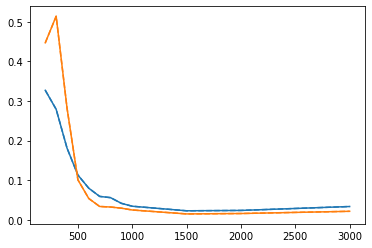

Looks good. Saving this to vbfHpm_LHC13_CMS_137.json


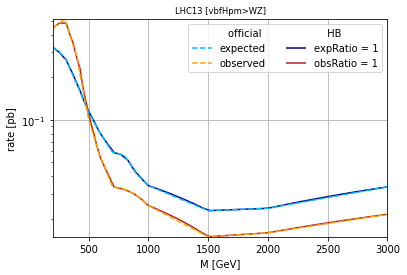

In [3]:
df = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1857811/Table%20limits%206-b/1/csv",
    comment="#",
    skiprows=12,
    skipfooter=111 - 25,
    engine="python",
    names=["m", "obs"],
)
dfExp = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1857811/Table%20limits%206-b/1/csv",
    comment="#",
    skiprows=29,
    skipfooter=111 - 42,
    names=["m", "exp"],
    engine="python",
)
assert np.allclose(df.m, dfExp.m)
df["exp"] = dfExp.exp

limitFile = implementChannelLimit(
    "1857811",
    {"channels": [["vbfHpm", "WZ"]]},
    "https://doi.org/10.17182/hepdata.102461.v1/t6",
    df,
    massResolution=resolution.massRes(
        5, 0.05
    ),  # they say that it's worse than 5% on p15
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
